Limpieza de datos para determinar las características de las películas que tienen mayor probabilidad a ser mejor puntuadas.

In [141]:
# Importar Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [142]:
#Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/Limpieza de datos/NetflixOriginals.csv"
data = pd.read_csv(ruta,encoding ="latin1")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [143]:
print(data.shape)
data.head()

(584, 6)


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,08-05-19,58,2.5,English/Japanese
1,Dark Forces,thriller,"August 21, 2020",81,2.6,ESP
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [144]:
# Revisar Variables categoricas y numericas
cols_cat = ['Title', 'Genre', 'Premiere', 'Language']

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       580 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    583 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [145]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       579 non-null    object 
 1   Genre       579 non-null    object 
 2   Premiere    579 non-null    object 
 3   Runtime     579 non-null    int64  
 4   IMDB Score  579 non-null    float64
 5   Language    579 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.7+ KB


In [146]:
cols_cat = ['Title', 'Genre', 'Premiere', 'Language']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna Title: 579 subniveles
Columna Genre: 130 subniveles
Columna Premiere: 397 subniveles
Columna Language: 46 subniveles


In [147]:
data.describe()

,Runtime,IMDB Score
count,579.000000,579.000000
mean,93.497409,6.274784
std,27.846426,0.976765
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.400000
75%,107.500000,7.000000
max,209.000000,9.000000


In [148]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')


Tamaño del set antes de eliminar las filas repetidas: (579, 6)
Tamaño del set después de eliminar las filas repetidas: (579, 6)


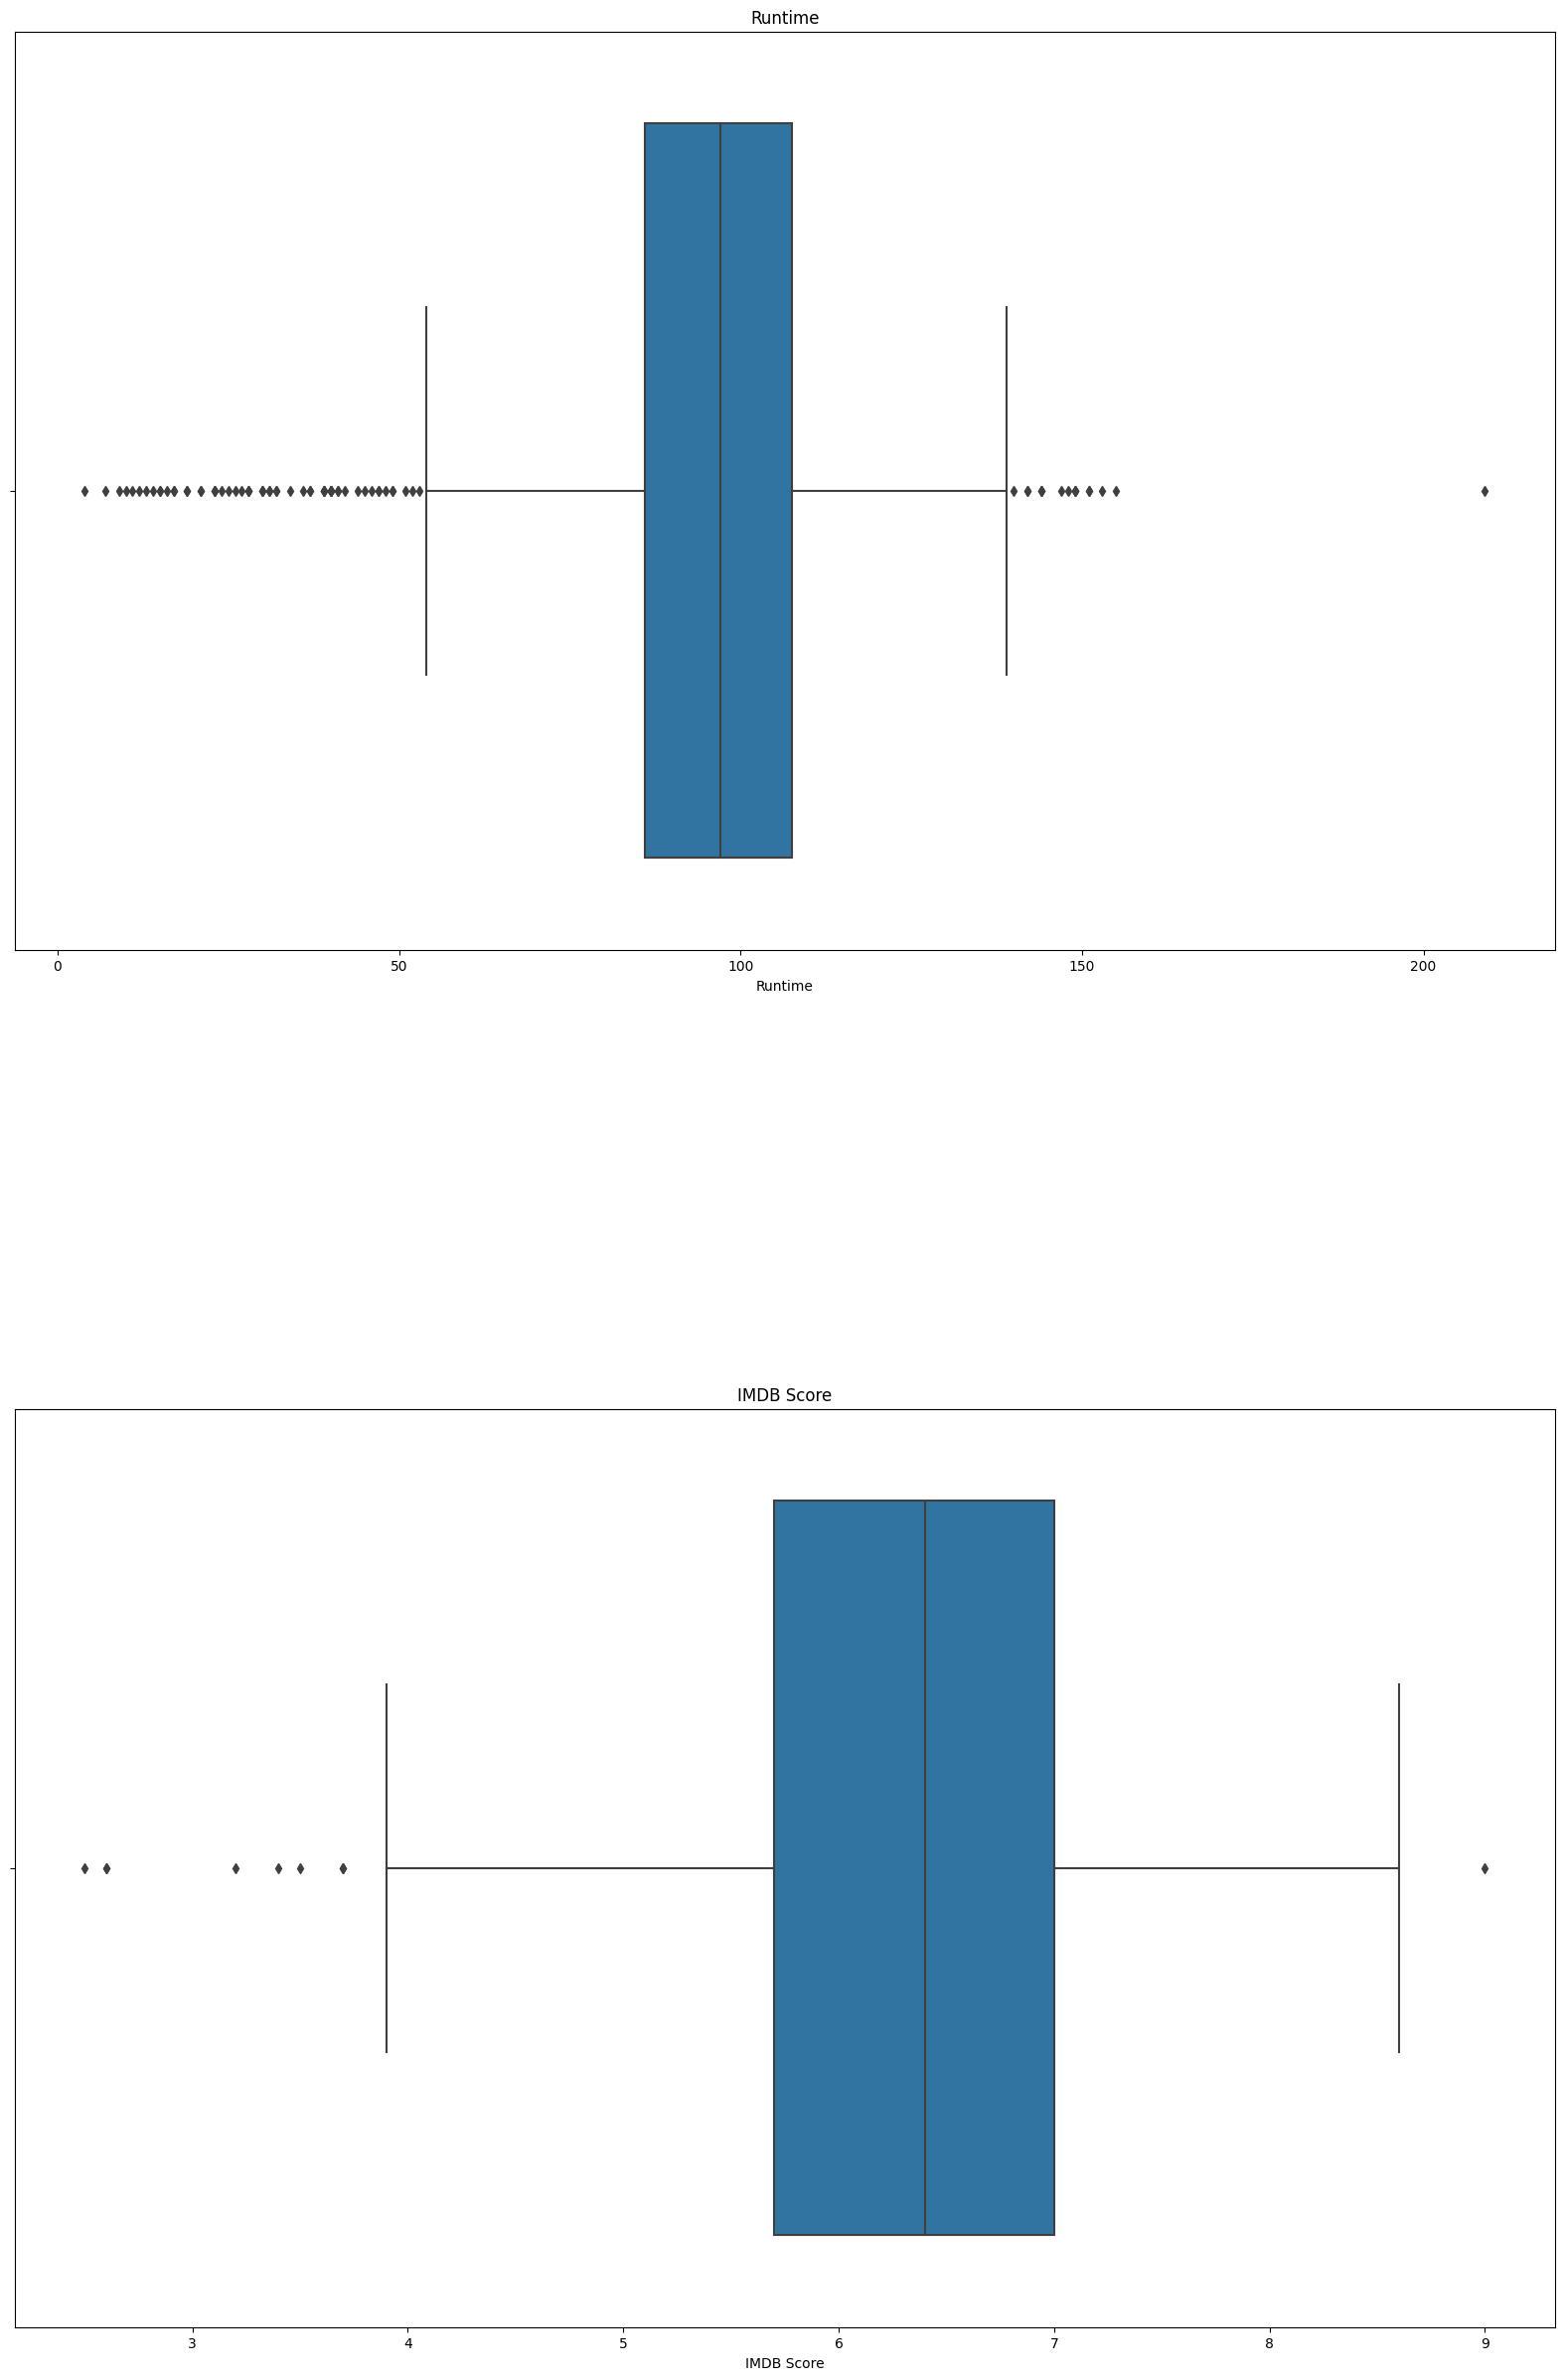

In [149]:
cols_num = ['Runtime', 'IMDB Score']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

**OBSERVACIONES**

Runtime: hay varias peliculas que duran menos de 60 min
IMDB Score: la mayoria de peliculas tiene una mediana calificacion que esta entre 6 y 7

Conclusion los datos que teniamos eran 585 al realizar la limpieza quedaron solamente 579 datos.



In [150]:
# Eliminar filas con "runtime"<60
print(f'Tamaño del set antes de eliminar registros de duracion: {data.shape}')
data = data[data['Runtime']<=60]
print(f'Tamaño del set después de eliminar registros de duracion: {data.shape}')

Tamaño del set antes de eliminar registros de duracion: (579, 6)
Tamaño del set después de eliminar registros de duracion: (71, 6)


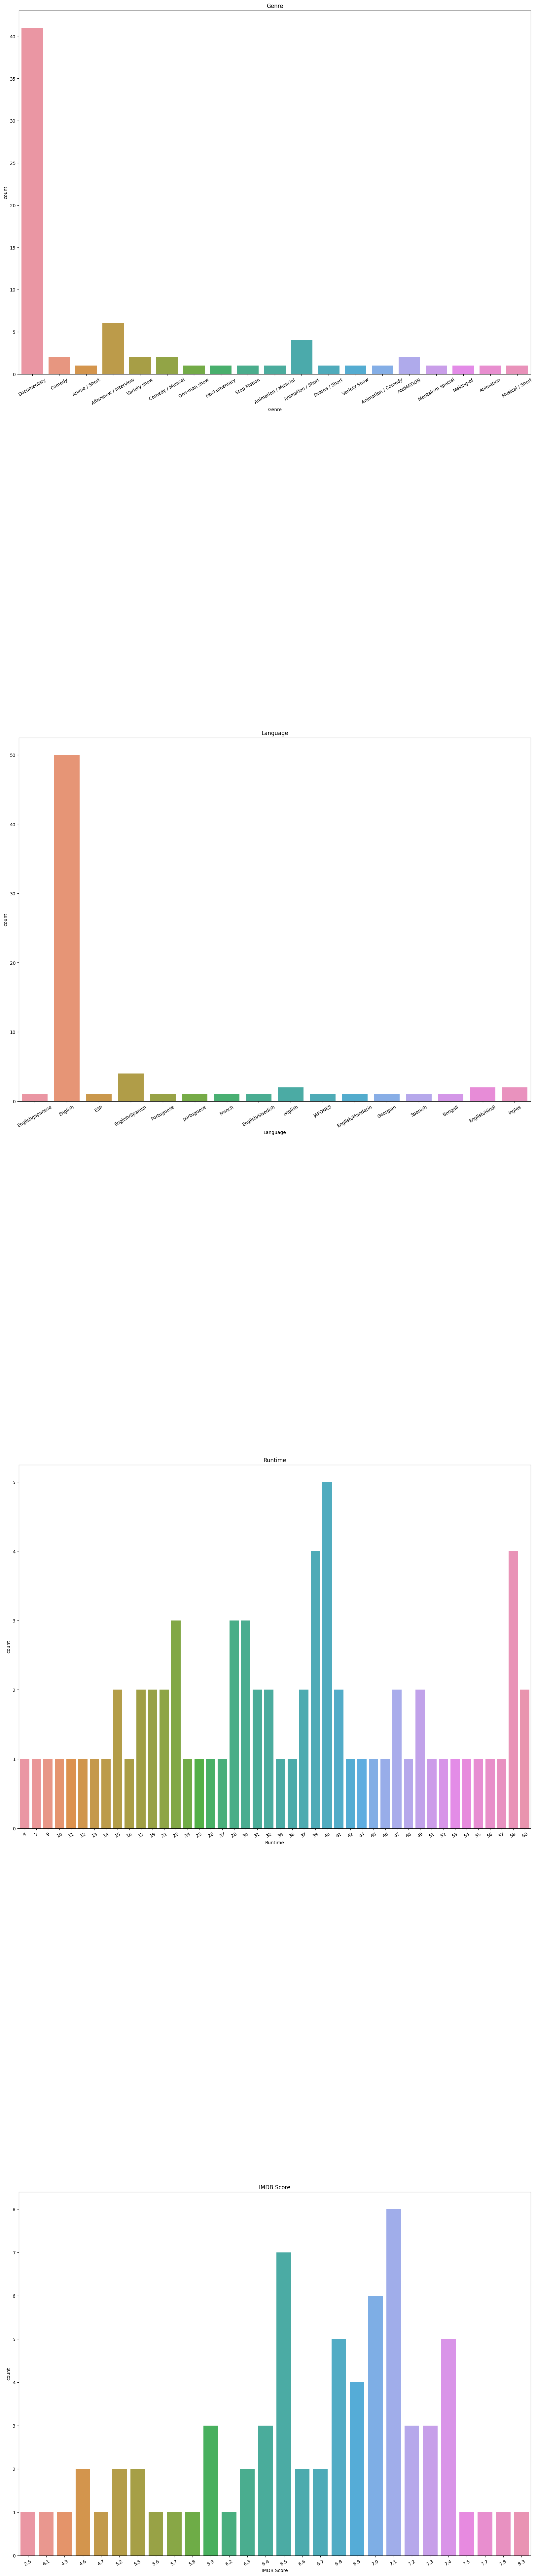

In [151]:
cols_cat = ['Genre', 'Language', 'Runtime', 'IMDB Score']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20,100))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [152]:
#UNIFICACION Genre

print(data['Genre'].unique())
data['Genre'] = data['Genre'].str.replace('ANIMATION','Animation', regex=False)
print(data['Genre'].unique())

['Documentary' 'Comedy' 'Anime / Short' 'Aftershow / Interview'
 'Variety show' 'Comedy / Musical' 'One-man show' 'Mockumentary'
 'Stop Motion' 'Animation / Musicial' 'Animation / Short' 'Drama / Short'
 'Variety Show' 'Animation / Comedy' 'ANIMATION' 'Mentalism special'
 'Making-of' 'Animation' 'Musical / Short']
['Documentary' 'Comedy' 'Anime / Short' 'Aftershow / Interview'
 'Variety show' 'Comedy / Musical' 'One-man show' 'Mockumentary'
 'Stop Motion' 'Animation / Musicial' 'Animation / Short' 'Drama / Short'
 'Variety Show' 'Animation / Comedy' 'Animation' 'Mentalism special'
 'Making-of' 'Musical / Short']


In [153]:
#UNIFICACION Language

print(data['Language'].unique())
data['Language'] = data['Language'].str.replace('portuguese','Portuguese', regex=False)
print(data['Language'].unique())

['English/Japanese' 'English' 'ESP' 'English/Spanish' 'Portuguese'
 'portuguese' 'French' 'English/Swedish' 'english' 'JAPONES'
 'English/Mandarin' 'Georgian' 'Spanish' 'Bengali' 'English/Hindi'
 'Ingles']
['English/Japanese' 'English' 'ESP' 'English/Spanish' 'Portuguese'
 'French' 'English/Swedish' 'english' 'JAPONES' 'English/Mandarin'
 'Georgian' 'Spanish' 'Bengali' 'English/Hindi' 'Ingles']


In [155]:
#UNIFICACION Language

print(data['Language'].unique())
data['Language'] = data['Language'].str.replace('Ingles','English', regex=False)
print(data['Language'].unique())

['English/Japanese' 'English' 'ESP' 'English/Spanish' 'Portuguese'
 'French' 'English/Swedish' 'english' 'JAPONES' 'English/Mandarin'
 'Georgian' 'Spanish' 'Bengali' 'English/Hindi' 'Ingles']
['English/Japanese' 'English' 'ESP' 'English/Spanish' 'Portuguese'
 'French' 'English/Swedish' 'english' 'JAPONES' 'English/Mandarin'
 'Georgian' 'Spanish' 'Bengali' 'English/Hindi']


In [156]:
#UNIFICACION Language

print(data['Language'].unique())
data['Language'] = data['Language'].str.replace('english','English', regex=False)
print(data['Language'].unique())

['English/Japanese' 'English' 'ESP' 'English/Spanish' 'Portuguese'
 'French' 'English/Swedish' 'english' 'JAPONES' 'English/Mandarin'
 'Georgian' 'Spanish' 'Bengali' 'English/Hindi']
['English/Japanese' 'English' 'ESP' 'English/Spanish' 'Portuguese'
 'French' 'English/Swedish' 'JAPONES' 'English/Mandarin' 'Georgian'
 'Spanish' 'Bengali' 'English/Hindi']


In [157]:
#UNIFICACION Language

print(data['Language'].unique())
data['Language'] = data['Language'].str.replace('ESP','Spanish', regex=False)
print(data['Language'].unique())

['English/Japanese' 'English' 'ESP' 'English/Spanish' 'Portuguese'
 'French' 'English/Swedish' 'JAPONES' 'English/Mandarin' 'Georgian'
 'Spanish' 'Bengali' 'English/Hindi']
['English/Japanese' 'English' 'Spanish' 'English/Spanish' 'Portuguese'
 'French' 'English/Swedish' 'JAPONES' 'English/Mandarin' 'Georgian'
 'Bengali' 'English/Hindi']


In [158]:
data.shape

(71, 6)

In [161]:
ruta = "/gdrive/MyDrive/Limpieza de datos/NetflixOriginals.csv"
data.to_csv(ruta, index=False)